# DATA ANALYSIS FOR DIFFERENT USAGE OF MOBILE HEALTH APPS

## Importing Libraries

In [4]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white',color_codes=True)
%matplotlib inline
import matplotlib.collections as mcol
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
from matplotlib.lines import Line2D


## Reading the Dataset

In [5]:
#Read in the dataset
df1 = pd.read_csv('C:/datasets/mHealth.csv', encoding = 'latin1')
#Latin 1 encoding is to interpret special character, to read in the file without producing error
#print(df1.max())
df1


,MID,DAY,SEX,AGE,GEN,PRE,ARE,JOB,MAR,CHI,...,q4s7,q4s8,q4s9,q4s10,q4s11,q4s12,q4s13,q4s14,q4s15,q5
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.000003e+09,6/8/2022 20:58,2.0,56.0,6.0,14.0,3.0,8.0,2.0,1.0,...,4.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.000004e+09,6/8/2022 22:17,1.0,64.0,7.0,13.0,3.0,6.0,2.0,1.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1.010023e+09,6/8/2022 19:31,2.0,42.0,5.0,23.0,4.0,9.0,1.0,2.0,...,5.0,5.0,5.0,5.0,2.0,5.0,5.0,5.0,5.0,3.0
1678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1679,1.010023e+09,6/8/2022 19:20,2.0,48.0,5.0,3.0,2.0,3.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,3.0,3.0
1680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df2 = df1.drop("q3t6", axis=1)#Delete "q3t6" column from the dataframe
print (df2.count())#Returns the number of non null values in each data frame column

MID      841
DAY      841
SEX      841
AGE      841
GEN      841
PRE      841
ARE      841
JOB      841
MAR      841
CHI      841
q1t1     413
q2c1     841
q2c2     841
q2c3     841
q2c4     841
q3       632
q4s1     632
q4s2     632
q4s3     632
q4s4     632
q4s5     632
q4s6     632
q4s7     632
q4s8     632
q4s9     632
q4s10    632
q4s11    632
q4s12    632
q4s13    632
q4s14    632
q4s15    632
q5       632
dtype: int64


In [7]:
df2.head() 

,MID,DAY,SEX,AGE,GEN,PRE,ARE,JOB,MAR,CHI,...,q4s7,q4s8,q4s9,q4s10,q4s11,q4s12,q4s13,q4s14,q4s15,q5
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.000003e+09,6/8/2022 20:58,2.0,56.0,6.0,14.0,3.0,8.0,2.0,1.0,...,4.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.000004e+09,6/8/2022 22:17,1.0,64.0,7.0,13.0,3.0,6.0,2.0,1.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

In [8]:
#To drop duplicate value
df2 = df2.drop_duplicates()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 0 to 1681
Data columns (total 32 columns):
MID      841 non-null float64
DAY      841 non-null object
SEX      841 non-null float64
AGE      841 non-null float64
GEN      841 non-null float64
PRE      841 non-null float64
ARE      841 non-null float64
JOB      841 non-null float64
MAR      841 non-null float64
CHI      841 non-null float64
q1t1     413 non-null object
q2c1     841 non-null float64
q2c2     841 non-null float64
q2c3     841 non-null float64
q2c4     841 non-null float64
q3       632 non-null float64
q4s1     632 non-null float64
q4s2     632 non-null float64
q4s3     632 non-null float64
q4s4     632 non-null float64
q4s5     632 non-null float64
q4s6     632 non-null float64
q4s7     632 non-null float64
q4s8     632 non-null float64
q4s9     632 non-null float64
q4s10    632 non-null float64
q4s11    632 non-null float64
q4s12    632 non-null float64
q4s13    632 non-null float64
q4s14    632 non-null floa

In [9]:
# To drop all rows that are completely empty
df= df2.dropna()
#df=sort_values(by='DAY',inplace=True)


In [10]:
#df.dtypes

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 1 to 1681
Data columns (total 32 columns):
MID      368 non-null float64
DAY      368 non-null object
SEX      368 non-null float64
AGE      368 non-null float64
GEN      368 non-null float64
PRE      368 non-null float64
ARE      368 non-null float64
JOB      368 non-null float64
MAR      368 non-null float64
CHI      368 non-null float64
q1t1     368 non-null object
q2c1     368 non-null float64
q2c2     368 non-null float64
q2c3     368 non-null float64
q2c4     368 non-null float64
q3       368 non-null float64
q4s1     368 non-null float64
q4s2     368 non-null float64
q4s3     368 non-null float64
q4s4     368 non-null float64
q4s5     368 non-null float64
q4s6     368 non-null float64
q4s7     368 non-null float64
q4s8     368 non-null float64
q4s9     368 non-null float64
q4s10    368 non-null float64
q4s11    368 non-null float64
q4s12    368 non-null float64
q4s13    368 non-null float64
q4s14    368 non-null floa

In [12]:
#df.corr()#It shows the correlation of each column

In [13]:
#Analyzing String Pattern Only
df.describe(include=[np.object])

,DAY,q1t1
count,368,368
unique,155,139
top,6/8/2022 19:02,Healthcare
freq,8,29


In [14]:
#print (df.max())#returns maximum of each column

In [15]:
#Statistical Analysis of the dataset.
df.describe()

,MID,SEX,AGE,GEN,PRE,ARE,JOB,MAR,CHI,q2c1,...,q4s7,q4s8,q4s9,q4s10,q4s11,q4s12,q4s13,q4s14,q4s15,q5
count,3.680000e+02,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,...,368.000000,368.000000,368.000000,368.000000,368.00000,368.000000,368.00000,368.000000,368.000000,368.000000
mean,1.005594e+09,1.546196,45.959239,5.105978,20.480978,4.165761,6.432065,1.611413,1.472826,0.573370,...,2.720109,2.554348,2.687500,2.711957,2.55163,2.750000,2.76087,2.521739,2.676630,2.720109
std,3.104661e+06,0.498539,13.681108,1.302760,11.127435,1.722498,2.836268,0.488093,0.499941,0.495261,...,0.916353,0.908502,0.856236,0.827766,0.88126,0.830285,0.84324,0.857450,0.883576,0.609129
min,1.000003e+09,1.000000,18.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000
25%,1.003129e+09,1.000000,35.000000,4.000000,13.000000,3.000000,4.000000,1.000000,1.000000,0.000000,...,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.00000,2.000000,2.000000,3.000000
50%,1.005871e+09,2.000000,47.000000,5.000000,19.500000,4.000000,6.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,3.000000,3.000000,2.00000,3.000000,3.00000,2.000000,3.000000,3.000000
75%,1.008132e+09,2.000000,56.000000,6.000000,27.000000,5.000000,9.000000,2.000000,2.000000,1.000000,...,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.00000,3.000000,3.000000,3.000000
max,1.010036e+09,2.000000,79.000000,7.000000,47.000000,8.000000,11.000000,2.000000,2.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.00000,5.000000,5.000000,3.000000


## Data Analysis and Visualization

### Grouping the Dataset by Gender

In [16]:
# 1 stands for Male,  2 stands for Female
k= df['SEX'].unique()
df_gen =df.groupby('SEX').count()
df_gen


,MID,DAY,AGE,GEN,PRE,ARE,JOB,MAR,CHI,q1t1,...,q4s7,q4s8,q4s9,q4s10,q4s11,q4s12,q4s13,q4s14,q4s15,q5
SEX,,,,,,,,,,,,,,,,,,,,,
1.0,167,167,167,167,167,167,167,167,167,167,...,167,167,167,167,167,167,167,167,167,167
2.0,201,201,201,201,201,201,201,201,201,201,...,201,201,201,201,201,201,201,201,201,201


In [17]:
re1 = df["SEX"].replace({1.0: "Male", 2.0: "Female"}, inplace=True)


C:\Users\user2222\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [18]:
#Dataset by Gender in percentage
dataset_byGender = df['SEX'].value_counts(ascending=False)*100/368 #368 is for total data by sex
dataset_byGender

Female    54.619565
Male      45.380435
Name: SEX, dtype: float64

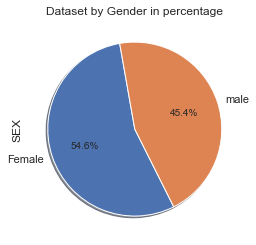

In [19]:
gen = ['Female','male']
dataset_byGender.plot(kind='pie',labels = gen, startangle =100, shadow=True,autopct ='%1.1f%%')
plt.title("Dataset by Gender in percentage")
plt.show()


#### 54.6%of the dataset are females and  45.4% are males

### AGE BAND

In [20]:
re3  = df["GEN"].replace({1.0:"15<", 2.0: "15-19",3.0: "20-29",4.0: "30-39",5.0: "40-49",6.0: "50-59",7.0: "60>="}, inplace=True)
AgeB= df["GEN"].value_counts()
AgeB

40-49    93
50-59    93
30-39    68
60>=     61
20-29    51
15-19     2
Name: GEN, dtype: int64

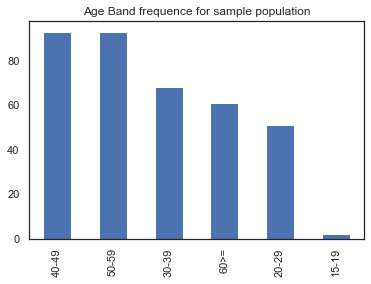

In [21]:
#Age Band
AgeB.plot(kind='bar')
plt.title("Age Band frequence for sample population")
plt.show()

#### Most participants fall into age range of 40-49 and 50-59

### ENGAGEMENT -is the app entertaining ?

In [22]:
f= df["q4s2"].value_counts()


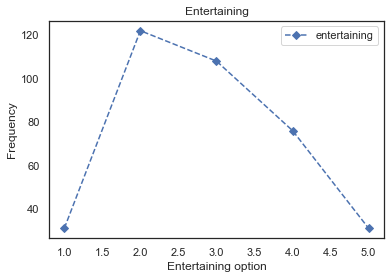

In [23]:
x= [1.0,2.0,3.0,4.0,5.0]
q4s2=[31,122,108,76,31]
plt.plot(x,q4s2, linestyle= 'dashed', marker='D', label='entertaining')
plt.title("Entertaining")
plt.ylabel('Frequency')
plt.xlabel('Entertaining option')
plt.legend()
plt.show()

#### The analysis shows that the app is entertaining.

### FUNCTIONALITY - Performance, Ease of use and Navigation.

In [24]:
#Functionality
b= df["q4s3"].value_counts()
c= df["q4s4"].value_counts()
d= df["q4s5"].value_counts()
d

2.0    177
3.0    108
1.0     38
4.0     31
5.0     14
Name: q4s5, dtype: int64

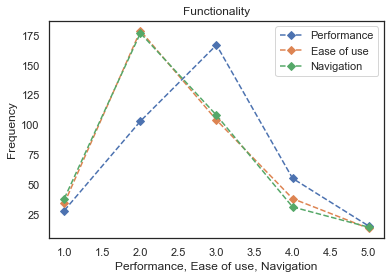

In [25]:
x= [1.0,2.0,3.0,4.0,5.0]# 1 stands for strongly agree, agree, not decided, disagree and strongly disagree.
q4s3=[28,103,167,55,15]
q4s4=[34,179,104,38,13]
q4s5=[38,177,108,31,14]
plt.plot(x,q4s3, linestyle= 'dashed', marker='D', label='Performance')
plt.plot(x,q4s4, linestyle= 'dashed', marker='D',label='Ease of use' )
plt.plot(x,q4s5, linestyle= 'dashed', marker='D',label='Navigation' )
plt.title("Functionality")
plt.ylabel('Frequency')
plt.xlabel('Performance, Ease of use, Navigation')
plt.legend()
plt.show()
#q4s3 is for performance, q4s4 is for Ease of use and q4s5 is for navigation

#### The application is easy to use and navigate

### AESTHETICS  -  Layout, Graphics, Visual Appeal

In [26]:
#AESTHETICS
g= df["q4s6"].value_counts()
h= df["q4s7"].value_counts()
i= df["q4s8"].value_counts()
i

2.0    154
3.0    130
4.0     38
1.0     35
5.0     11
Name: q4s8, dtype: int64

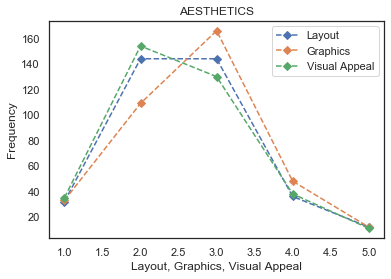

In [27]:
x= [1.0,2.0,3.0,4.0,5.0]# 1 stands for strongly agree, agree, not decided, disagree and strongly disagree.
q4s6=[32,144,144,36,12]
q4s7=[33,109,166,48,12]
q4s8=[35,154,130,38,11]
plt.plot(x,q4s6, linestyle= 'dashed', marker='D', label='Layout')
plt.plot(x,q4s7, linestyle= 'dashed', marker='D',label='Graphics' )
plt.plot(x,q4s8, linestyle= 'dashed', marker='D',label='Visual Appeal' )
plt.title("AESTHETICS")
plt.ylabel('Frequency')
plt.xlabel('Layout, Graphics, Visual Appeal')
plt.legend()
plt.show()

#### The analysis shows that the app looks good and have a good layout.

### PRIVACY, ETHICS and INFORMATION - Visual, Quality, Credibility, Confidentiality and privacy, ethical

In [28]:
j= df["q4s9"].value_counts()
k= df["q4s10"].value_counts()
l= df["q4s11"].value_counts()
m= df["q4s12"].value_counts()
n= df["q4s13"].value_counts()
j

3.0    162
2.0    133
4.0     40
1.0     22
5.0     11
Name: q4s9, dtype: int64

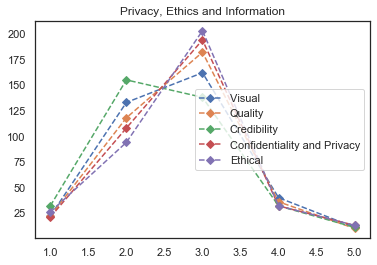

In [29]:
q4s9=[22,133,162,40,11]
q4s10=[22,118,182,36,10]
q4s11=[32,155,138,32,11]
q4s12=[21,108,194,32,13]
q4s13=[26,94,203,32,13]
plt.plot(x,q4s9, linestyle= 'dashed', marker='D', label='Visual ')
plt.plot(x,q4s10, linestyle= 'dashed', marker='D',label='Quality' )
plt.plot(x,q4s11, linestyle= 'dashed', marker='D',label='Credibility' )
plt.plot(x,q4s12, linestyle= 'dashed', marker='D',label='Confidentiality and Privacy' )
plt.plot(x,q4s13, linestyle= 'dashed', marker='D',label='Ethical' )
plt.title("Privacy, Ethics and Information")
plt.legend()
plt.show()

In [30]:
o= df["q4s14"].value_counts()
p= df["q4s15"].value_counts()
o

2.0    158
3.0    143
1.0     32
4.0     24
5.0     11
Name: q4s14, dtype: int64

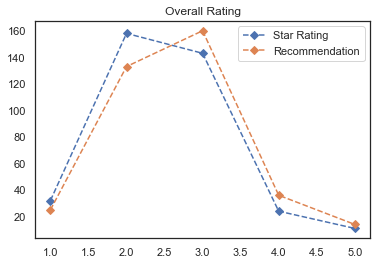

In [31]:

q4s14=[32,158,143,24,11]
q4s15=[25,133,160,36,14]
plt.plot(x,q4s14, linestyle= 'dashed', marker='D', label='Star Rating ')
plt.plot(x,q4s15, linestyle= 'dashed', marker='D',label='Recommendation' )
plt.title("Overall Rating")
plt.legend()
plt.show()

#### This analysis shows that the  application is well rated.

In [32]:
#Would you pay for this app?
q= df["q5"].value_counts()
q

3.0    296
2.0     41
1.0     31
Name: q5, dtype: int64

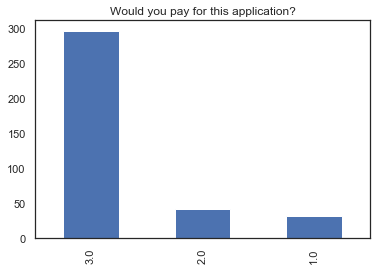

In [33]:
q.plot(kind='bar')
plt.title("Would you pay for this application?")
plt.show()
#1-This app is not free,   2-This app is free. If it is not free, I use this app,   3-This app is free. If it is not free, I do not use this app.

### Prefecture

In [34]:
re2  = df["PRE"].replace({1.0: "Hokkaido", 2.0: "Aomori",3.0: "Iwate",4.0: "Miyagi",5.0: "Akita",6.0: "Yamagata",7.0: "Fukushima",8.0: "Ibaragi",9.0: "Tochigi",10.0: "Gunma", 11.0:'Saitama', 12.0:'Chiba', 13.0:'Tokyo', 14.0:'Kanagawa', 15.0:'Niigata', 16.0:'Toyama', 17.0:'Ishikawa', 18.0:'Fukui', 19.0:'Yamanashi', 20.0:'Nagano', 21.0:'Gifu', 22.0:'Shizuoka', 23.0:'Aichi', 24.0:'Mie', 25.0:'Shiga',26.0:'Kyoto',27.0:'Osaka',28.0:'Hyogo',29.0:'Nara',30.0:'Wakayama',31.0:'Tottori',32.0:'Shimane',33.0:'Okayama',34.0:'Hiroshima',35.0:'Yamaguchi',36.0:'Tokushima',37.0:'Kagawa',38.0:'Ehime',39.0:'Kouchi',40.0:'Fukuoka',41.0:'Saga',42.0:'Nagasaki',43.0:'Kumamoto',44.0:'Oita',45.0:'Miyazaki',46.0:'Kagoshima',47.0:'Okinawa' }, inplace=True)
series2 = df["PRE"].value_counts()
series2

Tokyo        48
Osaka        36
Kanagawa     36
Aichi        32
Saitama      19
Hyogo        18
Hokkaido     15
Fukuoka      15
Chiba        14
Gunma         9
Miyagi        8
Hiroshima     8
Niigata       8
Okayama       8
Kyoto         8
Yamaguchi     8
Ibaragi       7
Shiga         6
Oita          5
Shizuoka      5
Fukushima     4
Mie           4
Kumamoto      4
Tochigi       4
Ehime         3
Gifu          3
Nara          3
Okinawa       3
Shimane       2
Tokushima     2
Yamagata      2
Akita         2
Kagoshima     2
Tottori       2
Yamanashi     2
Toyama        2
Nagasaki      2
Wakayama      2
Fukui         1
Kouchi        1
Saga          1
Iwate         1
Nagano        1
Aomori        1
Ishikawa      1
Name: PRE, dtype: int64

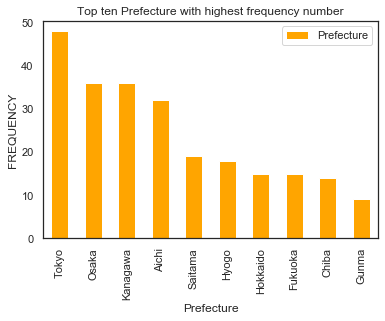

In [35]:
k = series2.head(10)
k.plot(kind='bar',color='orange', label='Prefecture')
plt.title("Top ten Prefecture with highest frequency number")
plt.xlabel("Prefecture")
plt.ylabel("FREQUENCY")
plt.legend()
plt.show()

#### Most participants from the sample population are from Tokyo

### Dataset by Region

In [36]:
re3  = df["ARE"].replace({1.0: "Hokkaido", 2.0: "Tohoku",3.0: "Kanto",4.0: "Chubu",5.0: "Kinki",6.0: "Chugoku",7.0: "Shikoku",8.0: "Kyushu"}, inplace=True)
series3 = df["ARE"].value_counts()
series3


Kanto       137
Kinki        77
Chubu        55
Kyushu       32
Chugoku      28
Tohoku       18
Hokkaido     15
Shikoku       6
Name: ARE, dtype: int64

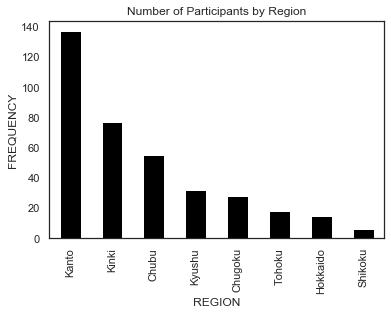

In [37]:
series3.plot(kind='bar',color='black')
plt.title("Number of Participants by Region")
plt.xlabel("REGION")
plt.ylabel("FREQUENCY")
plt.show()

#### The highest number of participants is from Kanto Region

### Exploring Occupation

In [38]:
#df['JOB'].astype(str)
re4  = df["JOB"].replace({1.0: "Civil-Servant", 2.0: "Exective",3.0: "Employee(Office based work)",4.0: "Employee(Manual work)",5.0: "Employee(Others)",6.0: "Self-employed",7.0: "Freelancer",8.0: "Housewife",9.0: "Part Time",10.0: "student", 11.0:'Others'}, inplace=True)
series4 = df["JOB"].value_counts()
series4


Part Time                      64
Employee(Office based work)    61
Employee(Others)               57
Housewife                      57
Employee(Manual work)          40
Others                         36
Self-employed                  18
student                        14
Civil-Servant                   9
Exective                        6
Freelancer                      6
Name: JOB, dtype: int64

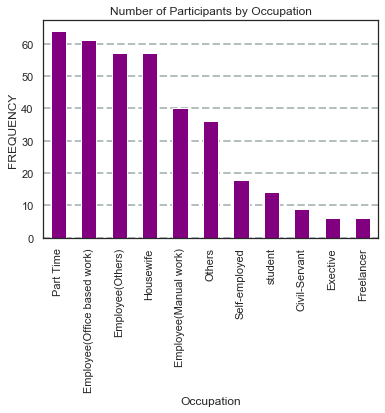

In [39]:
series4.plot(kind='bar', color='purple')
plt.title("Number of Participants by Occupation")
plt.xlabel("Occupation")
plt.ylabel("FREQUENCY")
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

### Marital Status

In [40]:
re5 = df["MAR"].replace({1.0: "Single", 2.0: "Married"}, inplace=True)

In [41]:
#Dataset by Marital Status in percentage
dataset_byMaritalStatus = df['MAR'].value_counts(ascending=False)*100/368 
dataset_byMaritalStatus

Married    61.141304
Single     38.858696
Name: MAR, dtype: float64

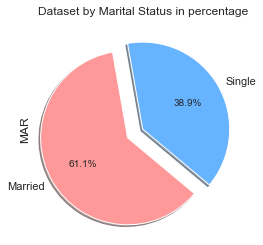

In [42]:
mars = ['Married','Single']
myexplode = [0.2, 0]

#colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
colors = ['#ff9999','#66b3ff']
dataset_byMaritalStatus.plot(kind='pie',labels = mars, startangle =100, shadow=True,autopct ='%1.1f%%', explode = myexplode, colors=colors)
plt.title("Dataset by Marital Status in percentage")
plt.show()

#### The analysis shows that 61.1% of sample population are married and 38.9% are single. 

### Total number of participants with kids and no kid

In [43]:
re6 = df["CHI"].replace({1.0: "Kids", 2.0: "No Kids"}, inplace=True)
dataset_byKids = df['CHI'].value_counts(ascending=False)*100/368
dataset_byKids

Kids       52.717391
No Kids    47.282609
Name: CHI, dtype: float64

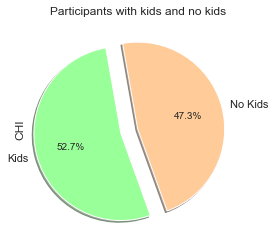

In [44]:
kid = ['Kids','No Kids']
myexplode = [0.2, 0]

#colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
colors = ['#99ff99','#ffcc99']
dataset_byKids.plot(kind='pie',labels = kid, startangle =100, shadow=True,autopct ='%1.1f%%', explode = myexplode, colors=colors)
plt.title("Participants with kids and no kids")
plt.show()

### Mobile OS version

In [45]:
#df.plot.bar()

In [46]:
#N = 5
#ind = np.arange(N)

In [47]:
#fig, ax = plt.subplots()

#p1 = ax.bar(ind,label='Men',height)
#p2 = ax.bar(ind,label='Women',height)
#ax.legend()

In [48]:
#Overall Star rating of the Application

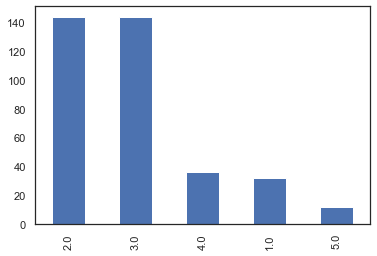

In [49]:
#AESTHETICS-Layout(Is the app icon well alligned?)
layout = df["q4s6"].value_counts()
layout.plot(kind='bar')
plt.show()

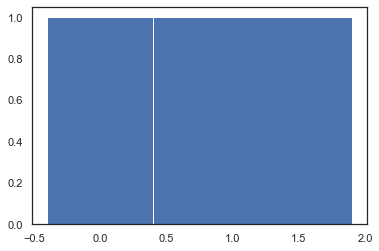

In [50]:
#df.plot.bar()
plt.bar(df['q2c1'], df['q2c2'])
plt.show()